# Covid-19
## Spreading analysis

### source : humdata.org
### source file : https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [1]:
#import covid19_tools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import math
from datetime import datetime

from tools.analysis_tools import getCountryData, showCountryData, getDataFromDayZero

%matplotlib inline

In [2]:
data_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv", delimiter=",", parse_dates=True, encoding="utf8")
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv", delimiter=",", parse_dates=True, encoding="utf8")
datasets = {
    'confirmed': data_confirmed,
    'death': data_death,
    'recovered': data_recovered
}

In [3]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [4]:
data_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,10,15,16,19,22,22,27,29,29,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


In [5]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,33,34,34,35,35,35,35,41,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,101,118,118,118,118,118,144,144,144,150
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,96,96,97,105,105,109,114,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,26,26,26,35,42,42,49,60,75


## Covid-19's evolution comparaison

In [6]:
data_confirmed.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20'],
      dtype='object')

### Comparing covid-19's evolution

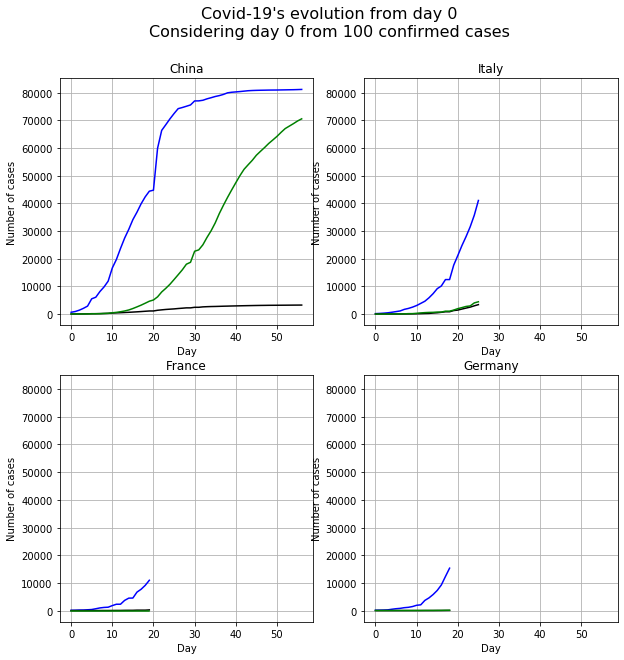

In [7]:
countries = ['China', 'Italy', 'France', 'Germany']
# countries = data_confirmed['Country/Region'].unique().tolist()

threshold = 100 # 100 confirmed cases for a more significant plotting
dicts = {country: getDataFromDayZero(country, datasets, threshold=threshold) for country in countries}

fig, axs = showCountryData(dicts, day_zero=True)
fig.suptitle(f'Covid-19\'s evolution from day 0\nConsidering day 0 from {threshold} confirmed cases', fontsize=16)
plt.show()

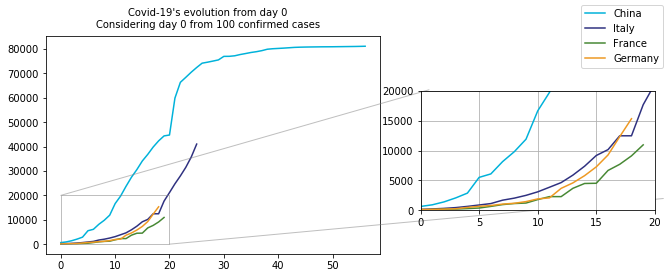

In [75]:
# overlapped version
colors = ['#00b2da', '#2F3180', '#478834', '#ee9922']
fig, ax = plt.subplots()
for (key, subdict), color in zip(dicts.items(), colors):
    ax.plot(list(subdict['confirmed'].keys()), list(subdict['confirmed'].values()), color=color, label=key)
#ax.grid()
fig.legend()
fig.suptitle(f'Covid-19\'s evolution from day 0\nConsidering day 0 from {threshold} confirmed cases', fontsize=10)

def zoomArea():
    # TODO: generalize this function
    x1, x2, y1, y2 = 0, 20, 0, 20000
    axins = ax.inset_axes([1.12, 0.2, 0.7, 0.55])
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    for (key, subdict), color in zip(dicts.items(), colors):
        axins.plot(list(subdict['confirmed'].keys())[:x2+1], list(subdict['confirmed'].values())[:x2+1], color=color)
    axins.grid()
    
zoomArea()
ax.indicate_inset_zoom(axins)
plt.show()

## China analysis

In [9]:
china_data = {
    'China': getCountryData('China', datasets)
}
quarantine_date = datetime.strptime('25/01/2020', '%d/%m/%Y')
max_confirmed = max(china_data['China']['confirmed'].values())

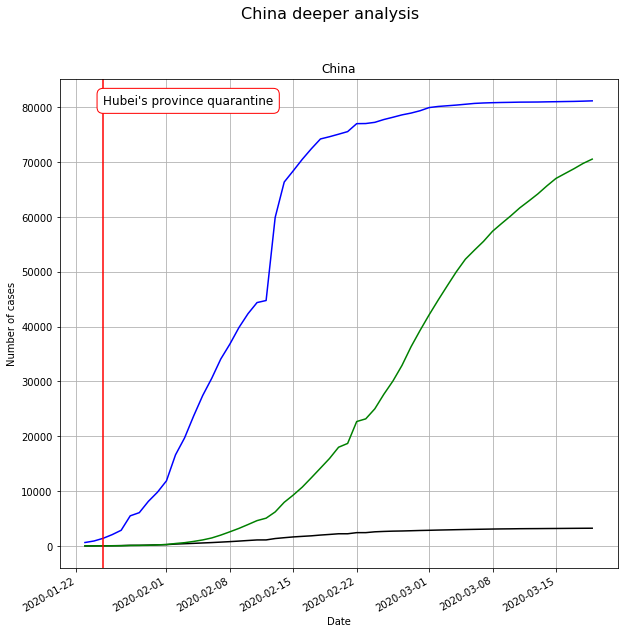

In [10]:
fig, axs = showCountryData(china_data)
fig.suptitle(f'China deeper analysis', fontsize=16)
plt.axvline(quarantine_date, c='red')

plt.text(quarantine_date, max_confirmed, 'Hubei\'s province quarantine',
         {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="red", pad=0.5)})

plt.gcf().autofmt_xdate()
plt.show()